In [5]:
import numpy as np
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
iris = pd.read_csv('examples/iris.csv')
iris.describe()

,caseno,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.head()

,caseno,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [8]:
iris.rename(columns={iris.columns[0] : 'No',
                     iris.columns[1] : 'SL',
                     iris.columns[2] : 'SW',
                     iris.columns[3] : 'PL',
                     iris.columns[4] : 'PW',
                     iris.columns[5] : 'Y'}, inplace = True) # inplace=True를 써서 실제로 컬럼명을 바꿔줌 없으면 안바뀜
iris.head()

,No,SL,SW,PL,PW,Y
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


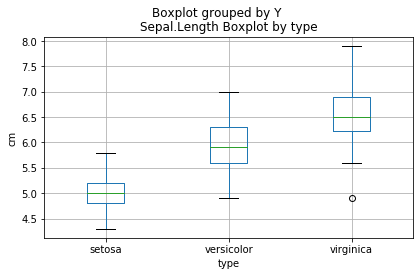

In [9]:
iris[["SL","Y"]].boxplot(by='Y')
plt.tight_layout(pad=2, h_pad=1) # pad: 박스플랏과 제목 사이 간격, h_pad: 1행 2행 사이 간격
plt.title("Sepal.Length Boxplot by type")
plt.xlabel("type")
plt.ylabel("cm")
plt.show()

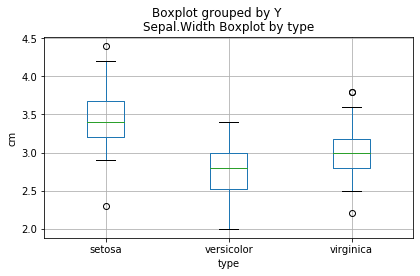

In [10]:
iris[["SW","Y"]].boxplot(by='Y')
plt.tight_layout(pad=2, h_pad=1) 
plt.title("Sepal.Width Boxplot by type")
plt.xlabel("type")
plt.ylabel("cm")
plt.show()

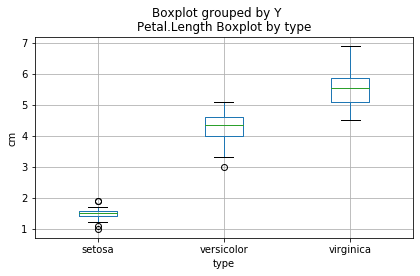

In [11]:
iris[["PL","Y"]].boxplot(by='Y')
plt.tight_layout(pad=2, h_pad=1) 
plt.title("Petal.Length Boxplot by type")
plt.xlabel("type")
plt.ylabel("cm")
plt.show()

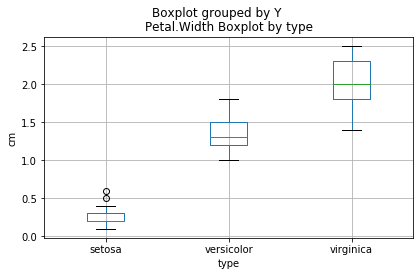

In [12]:
iris[["PW","Y"]].boxplot(by='Y')
plt.tight_layout(pad=2, h_pad=1) 
plt.title("Petal.Width Boxplot by type")
plt.xlabel("type")
plt.ylabel("cm")
plt.show()

C:\Users\Home\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


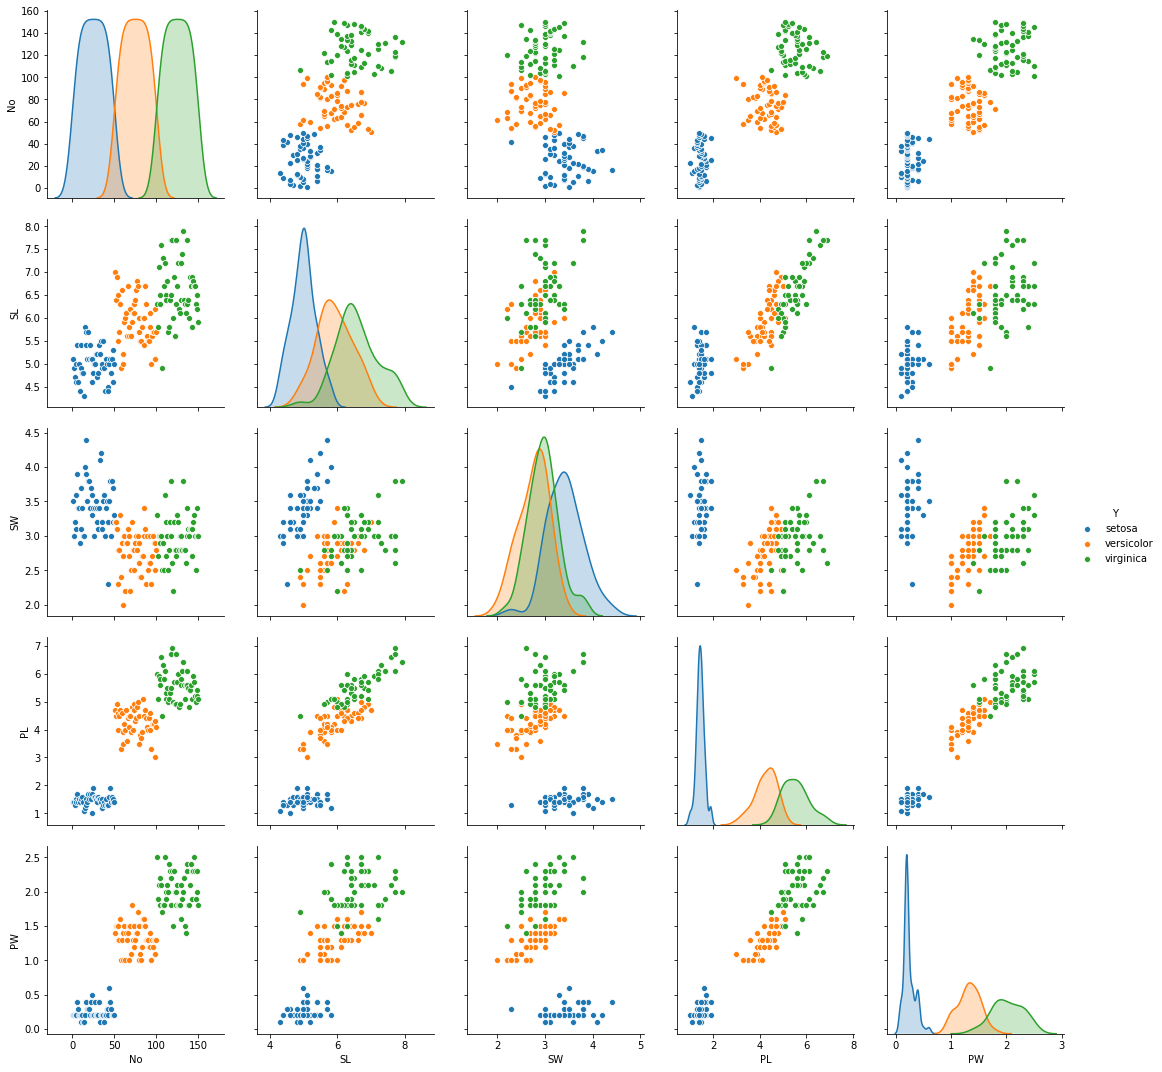

In [13]:
from copy import copy
exiris = copy(iris)
exiris["id"] = list(range(1,151))
sns.pairplot(exiris.drop("id", axis=1), hue="Y", size=3)

In [14]:
## Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Y = iris["Y"] 
X = iris[["SL","SW","PL","PW"]] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3) # train set(0.7) & test set(0.3) 

log_clf = LogisticRegression() # log_cif에 logistic regression 입력
log_clf.fit(X_train,Y_train) # train set 을 이용하여 만들 모델 생성
print("Prediction% : ", log_clf.score(X_test, Y_test)) # test set 을 사용하여 예측한 예측율

Prediction% :  0.9777777777777777


C:\Users\Home\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Home\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


#### < 이진분류 결과표 > 
###### - True Positive(TP) : T를 T로 예측
###### - True Negative(TN) : F를 F로 예측
###### - False Positive(FP) : F를 T로 예측
###### - False Negative(FN) : T를 F로 예측

#### < 평가점수 > 
###### - 정확도(Accuracy) : TP + TN / TP + TN + FP + FN  ~ 전체 샘플 중 맞게 예측한 샘플 수의 비율, 모형 트레이닝 즉 최적화에서 목적함수로 사용
###### - 정밀도(Precision) : TP / TP + FP ~ True라고 예측한 샘플 중 실제로 True인 샘플의 비율
###### - 재현율(Recall) : TP / TP + FN  ~ 민감도(sensitivity)라고도 한다. 실제 True인 샘플들 중 True로 에측된 샘플의 비율
###### - Fall-Out 위양성율 : FP / FP + TN ~ 실제 False인 샘플들 중 True라고 예측된 샘플의 비율
###### - 특이도(sensitivity) : 1 - Fall-Out ~ 실제 False인 샘플들 중 False라고 예측된 샘플의 비율
###### - f1-score : 2precisionrecall / (precision + recall) ~ 정밀도와 재현율의 가중 조화 평균
###### - support : (1+B^2)(precision*recall) / (B^2 precision + recall)

In [15]:
from sklearn import metrics
expected = Y_test
predicted = log_clf.predict(X_test)
print(metrics.classification_report(Y_test, predicted)) # 전체 모형의 성능 평가

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



##### < ROC curve >
###### - ROC 커브란 클래스 판별 기준값의 변화에 따른 위양성률(Fall-Out)과 재현율(recall)의 변화를 시각화 한것이다.
###### - ROC 커브의 면적인 AUC가 1에 가까울 수록 정확한 모델이 된다.
###### - 모델을 사용하는 상황에 따라 어떠한 모델을 사용하는 게 좋을지 결정하는데에 도움이 된다.
###### - ROC커브는 다항 로지스틱 분석에서 그릴수 없기 때문에 이항형으로 바꿔주고 새롭게 로지스틱회귀분석을 실시한다.

In [16]:
#Y_new = Y[:]
Y_new = copy(Y)
Y_new.loc[Y_new != "versicolor"] = 0
Y_new.loc[Y_new == "versicolor"] = 1
X_new = copy(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size = 0.3) # 자료를 train set(0.7)과 test set(0.3)을 나눔

log_clf = LogisticRegression() # log_cif에 logistic regression 입력
log_clf.fit(X_train,Y_train) # train set 을 이용하여 만들 모델 생성
print("Prediction%: ", log_clf.score(X_test, Y_test)) # test set 을 사용하여 예측한 예측율

Prediction%:  0.7333333333333333


C:\Users\Home\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##### < reading the ROC Curve > 
###### - AUC(Area Under the Curve)는 곡선 아래 면적을 나타낸다.
###### - 레퍼런스 라인인 0.5 위쪽으로 형성 되어야 의미있는 검사법이다.
###### - Muller가 2005년 발표한 논문의 AUC 레벨 등급
######   (0.90 - 1.00 : Excellent   / 0.80 - 0.90 : Good   / 0.70 - 0.80 : Fair   / 0.60 - 0.70 : Poor / 0.50 - 0.60 : Fail) 

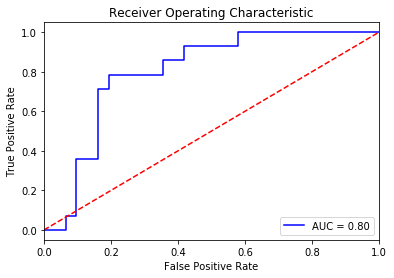

In [17]:
from sklearn import svm, datasets
from sklearn.datasets import load_breast_cancer

y_pred_proba = log_clf.predict_proba(X_test)[::,1] # 각 값이 1일 확률

fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_proba) # ROC Curve
roc_auc = metrics.auc(fpr, tpr) # AUC

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()